# **Exploratory Data Analysis**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Unique age groups:", df["age"].unique())
print("Number of age groups:", df["age"].nunique())

print("\nAge distribution:")
print(df["age"].value_counts())

print("\nMissing age entries:", df["age"].isna().sum())

Unique age groups: ['teens' nan 'thirties' 'fifties' 'fourties' 'seventies' 'twenties'
 'sixties' 'eighties']
Number of age groups: 8

Age distribution:
age
twenties     13909
teens        13425
fourties      9004
thirties      8750
fifties       4244
sixties       2208
seventies     1089
eighties       255
Name: count, dtype: int64

Missing age entries: 2789


In [ ]:
df = df[df["age"].notna()]

df["full_path"] = df["path"].apply(lambda x: os.path.join(AUDIO_DIR, x))
df = df[df["full_path"].apply(os.path.exists)]

print("Samples after cleaning:", len(df))

Samples after cleaning: 52884


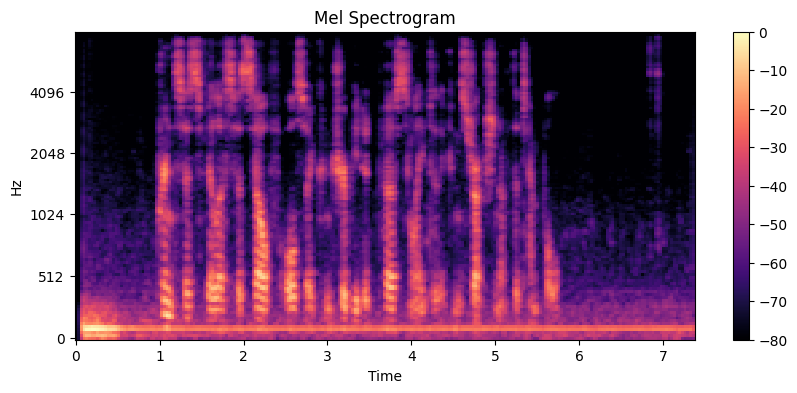

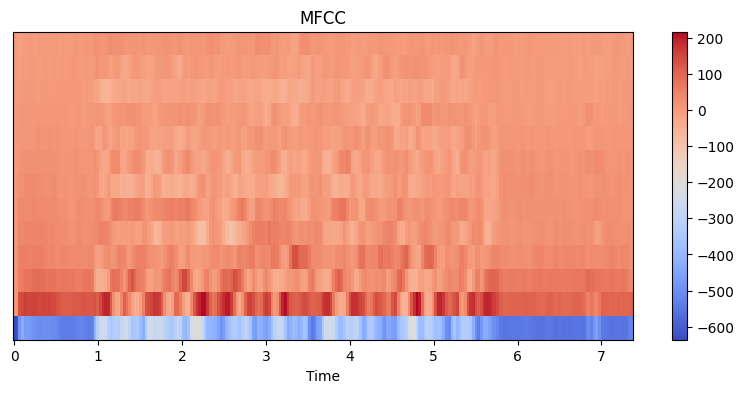

In [ ]:
import librosa
import librosa.display

sample_path = df["full_path"].iloc[0]
signal, sr = librosa.load(sample_path, sr=16000)

S = librosa.feature.melspectrogram(y=signal, sr=sr)
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.title("Mel Spectrogram")
plt.colorbar()
plt.show()

mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.title("MFCC")
plt.colorbar()
plt.show()

I use 13 MFCCs because they capture the specific voice qualities that change as a person gets older. The shape of our vocal tract shifts with age, affecting the richness and tone of our voice, and these first 13 coefficients represent that core sound perfectly. This allows my model to focus on the physical characteristics of the speaker rather than temporary things like pitch or volume.

This number also gives me the best balance between useful data and unnecessary noise. The higher numbers often just capture background static or recording details that would confuse the classifier. By limiting it to 13, I ensure the model ignores that clutter and only learns the strong, consistent patterns that separate different age groups.